In [27]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [28]:
""" definisi fungsi keanggotaan tiap variabel"""

# Defining variable membership function
""" definisi semesta variabel """
kehadiran = ctrl.Antecedent(np.arange(0, 25, 1), 'kehadiran')
penjualan = ctrl.Antecedent(np.arange(0, 100, 1), 'penjualan')
bonus = ctrl.Consequent(np.arange(0, 15, 1), 'bonus')


In [29]:
# Generate fuzzy membership functions
"""fungsi keanggotaan fuzzy"""

kehadiran['malas'] = fuzz.trapmf(kehadiran.universe, [0,0, 5, 10])
kehadiran['sedang'] = fuzz.trapmf(kehadiran.universe, [5,10, 15, 20])
kehadiran['rajin'] = fuzz.trapmf(kehadiran.universe, [15,20, 25, 25])



In [30]:
penjualan['sedikit'] = fuzz.trapmf(penjualan.universe, [0,0, 30, 60])
penjualan['banyak'] = fuzz.trapmf(penjualan.universe, [30,60, 100, 100])

In [31]:
bonus['rendah'] = fuzz.trapmf(bonus.universe, [0 , 0, 3, 5])
bonus['sedang'] = fuzz.trapmf(bonus.universe, [3, 5, 10, 12])
bonus['tinggi'] = fuzz.trapmf(bonus.universe, [10, 12, 15, 15])

c:\Users\ASUS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


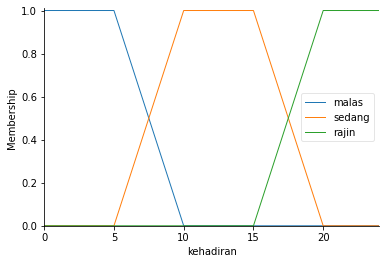

In [32]:
kehadiran.view()

c:\Users\ASUS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


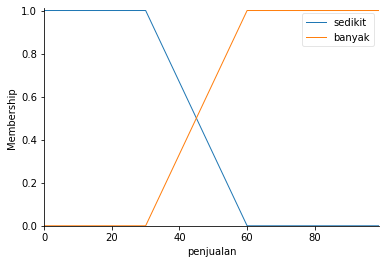

In [33]:
penjualan.view()

c:\Users\ASUS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


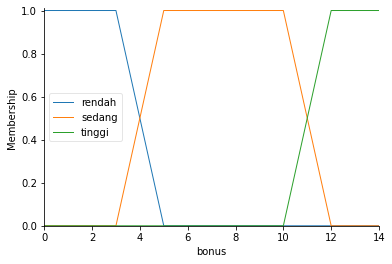

In [34]:
bonus.view()


In [35]:
# Aturan/Rule
#1 jika Kehadiran rajin dan jumlah Penjualan banyak, maka Bonus adalah tinggi
# If Attendance is diligent and the number of Sales is large, then the Bonus is high
rule1 = ctrl.Rule(kehadiran['rajin'] & penjualan['banyak'], bonus['tinggi'])
#2 Jika Kehadiran sedang dan jumlah Penjualan banyak, maka Bonus adalah sedang
# If attendance is moderate and the number of sales is large, then the bonus is moderate
rule2 = ctrl.Rule(kehadiran['sedang'] & penjualan['banyak'], bonus['sedang'])
#3 Jika Kehadiran malas dan jumlah Penjualan sedikit, maka Bonus adalah rendah
# If Attendance is lazy and the number of Sales is small, then the Bonus is low
rule3 = ctrl.Rule(kehadiran['malas'] & penjualan['sedikit'], bonus['rendah'])
#4 Jika Kehadiran malas dan jumlah Penjualan banyak, maka Bonus adalah sedang
# If Attendance is lazy and the number of Sales is large, then the Bonus is moderate
rule4 = ctrl.Rule(kehadiran['malas'] & penjualan['banyak'], bonus['sedang'])

bonus_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

In [36]:
prediksi = ctrl.ControlSystemSimulation(bonus_ctrl)

In [37]:
# Jika agen tersebut memiliki gaji pokok Rp 2,000,000 kemudian total masuk dalam sebulan adalah 15 hari dan dapat menjual sejumlah 40 item produk, 
# Hitung total gaji yang diperoleh (bonus + gaji pokok).
# If the agent has a basic salary of IDR 2,000,000 then the total entry in a month is 15 days and can sell a total of 40 product items,
# Calculate the total salary earned (bonus + base salary).
prediksi.input['kehadiran'] = 15
prediksi.input['penjualan'] = 40

print(prediksi.compute())

None


7.5


c:\Users\ASUS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


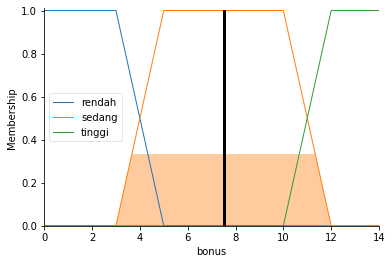

In [38]:
#Memprediksi bonus
#Predicting bonus
print(prediksi.output['bonus'])
bonus.view(sim=prediksi)

In [44]:
#Mengkalkulasi Total Pendapatan
#Calculating Total Income
Gaji = 2000000
Bonus = Gaji*(prediksi.output['bonus']/100)
Total = Gaji+abs(Bonus)
print("Rp ",Total)

Rp  2150000.0
